In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt
#plt.style.use("dark_background")
from network_profile import log_memory, t_profile_net
%matplotlib inline
import network_profile
import numpy as np
import pandas as pd
torch.backends.cudnn.benchmark = True

## Init model and data

#### Todo now
 - Print human readable DataFrame
 - Fix the plots (readable x axis)
 
#### Todo later
 - Make memory and computation profiling more similar.
 - Use same datastructures is possible
 - Debug

In [3]:
model = models.resnet18().cuda()
inp = torch.randn(8, 3, 112, 112).cuda()

### Computation profiling

In [4]:
data = t_profile_net(model,inp)

In [6]:
data

,layer,fw_operation (Giga),forward_time (us),forward_effi (TFLOPs),bw_operation (Giga),backward_time (us),backward_effi (TFLOPs),bw_time/fw_time,input_size,output_size
0,Conv2d,236.027904,171.071991,1.379699,472.055808,465.759766,1.013518,2.722595,"(8, 3, 112, 112)","(8, 64, 56, 56)"
1,BatchNorm2d,1.605632,339.967957,0.004723,1.605632,393.216797,0.004083,1.156629,"(8, 64, 56, 56)","(8, 64, 56, 56)"
2,ReLU,1.605632,98.303833,0.016333,1.605632,79.873047,0.020102,0.812512,"(8, 64, 56, 56)","(8, 64, 56, 56)"
3,MaxPool2d,1.605632,95.392090,0.016832,1.605632,402.142578,0.003993,4.215681,"(8, 64, 56, 56)","(8, 64, 28, 28)"
4,Conv2d,231.211008,95.327881,2.425429,462.422016,197.982422,2.335672,2.076857,"(8, 64, 28, 28)","(8, 64, 28, 28)"
5,BatchNorm2d,0.401408,104.447876,0.003843,0.401408,217.089844,0.001849,2.078451,"(8, 64, 28, 28)","(8, 64, 28, 28)"
6,ReLU,0.401408,86.015991,0.004667,0.401408,242.367188,0.001656,2.817699,"(8, 64, 28, 28)","(8, 64, 28, 28)"
7,Conv2d,231.211008,42.783936,5.404155,462.422016,126.144531,3.665811,2.948409,"(8, 64, 28, 28)","(8, 64, 28, 28)"
8,BatchNorm2d,0.401408,74.176025,0.005412,0.401408,243.328125,0.001650,3.280415,"(8, 64, 28, 28)","(8, 64, 28, 28)"
9,ReLU,0.401408,68.543945,0.005856,0.401408,206.847656,0.001941,3.017738,"(8, 64, 28, 28)","(8, 64, 28, 28)"


53.8

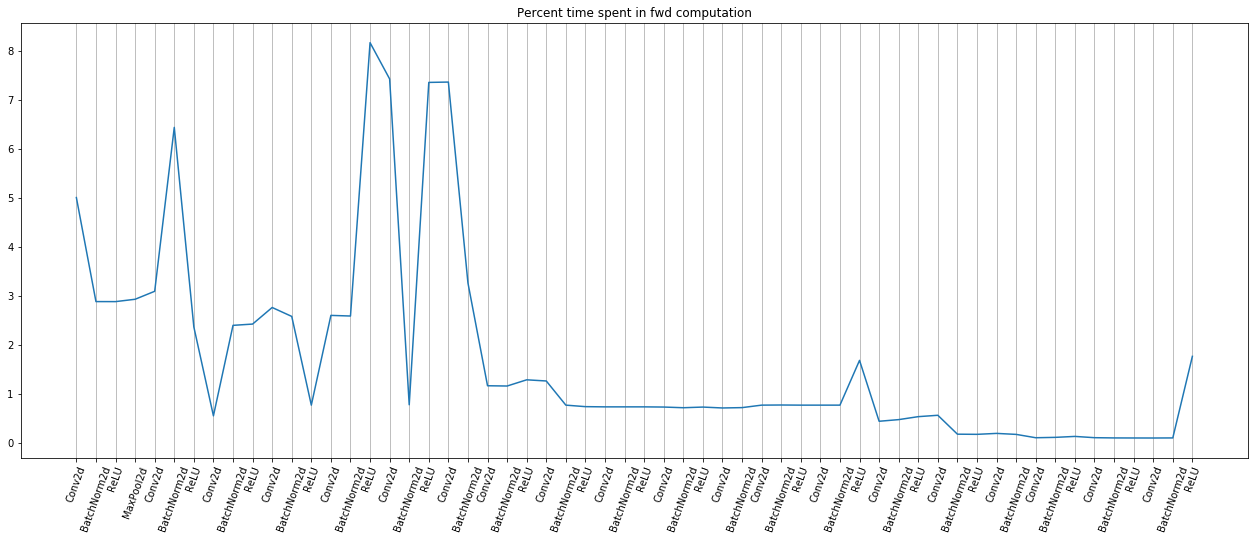

In [42]:
times_fwd = data["forward_time"] / data["forward_time"].sum() * 100
plt.figure(figsize=(22,8))
plt.xticks(range(len(times_fwd)),data["layer"].values.tolist(),rotation=70)
plt.plot(times_fwd)
plt.title("Percent time spent in fwd computation")
plt.gca().xaxis.grid(True)

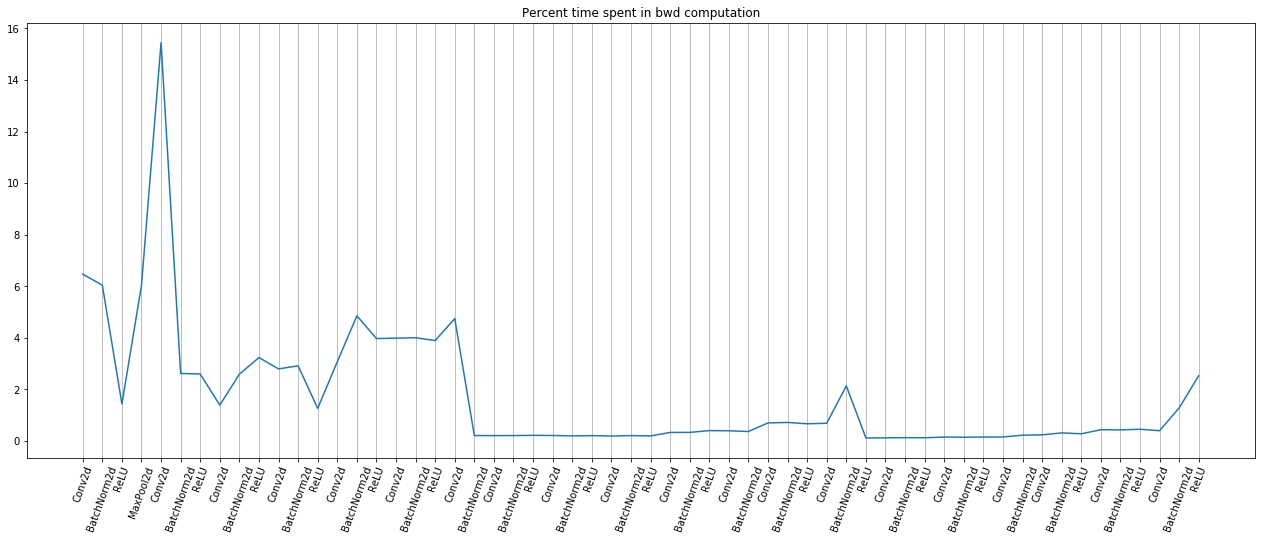

In [43]:
# Plot the percentage of bwd time spent in each layer
times_bwd = data["backward_time"] / data["backward_time"].sum() *100
plt.figure(figsize=(22,8))
plt.xticks(range(len(times_bwd)),data["layer"].values.tolist(),rotation=70)
plt.plot(times_bwd)
plt.title("Percent time spent in bwd computation")
plt.gca().xaxis.grid(True)

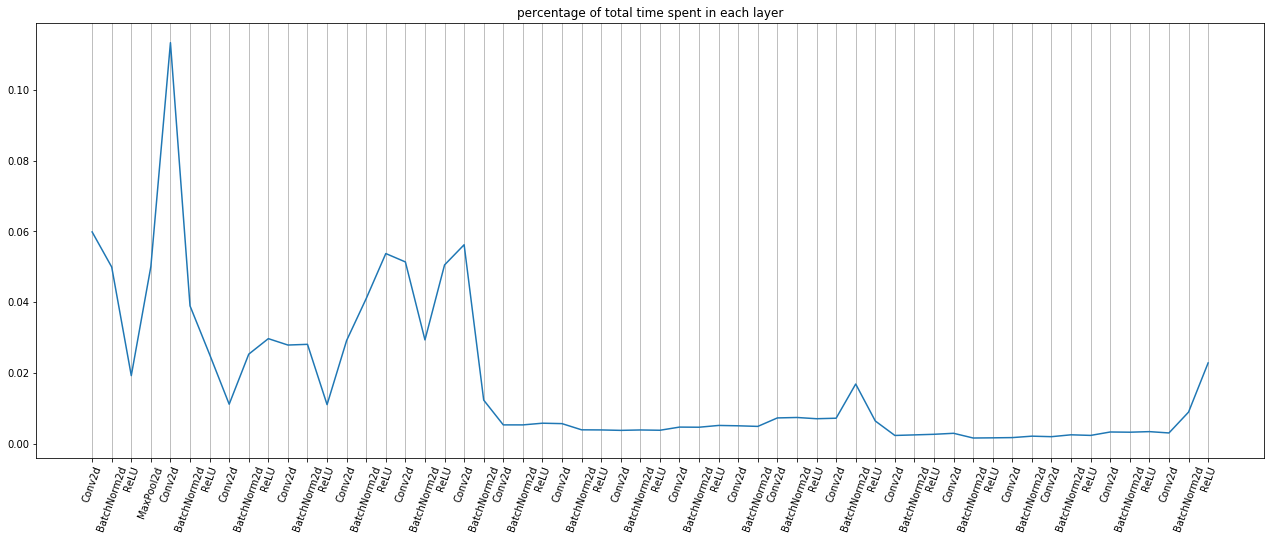

In [44]:
# Plot the percentage of total time spent in each layer
plt.figure(figsize=(22,8))
tot_time = data["backward_time"].sum() + data["forward_time"].sum()
times = (data["backward_time"] + data["forward_time"]) / tot_time
plt.xticks(range(len(times)),data["layer"].values.tolist(),rotation=70)
plt.title("percentage of total time spent in each layer")
plt.plot(times)
plt.gca().xaxis.grid(True)

### Memory profiling

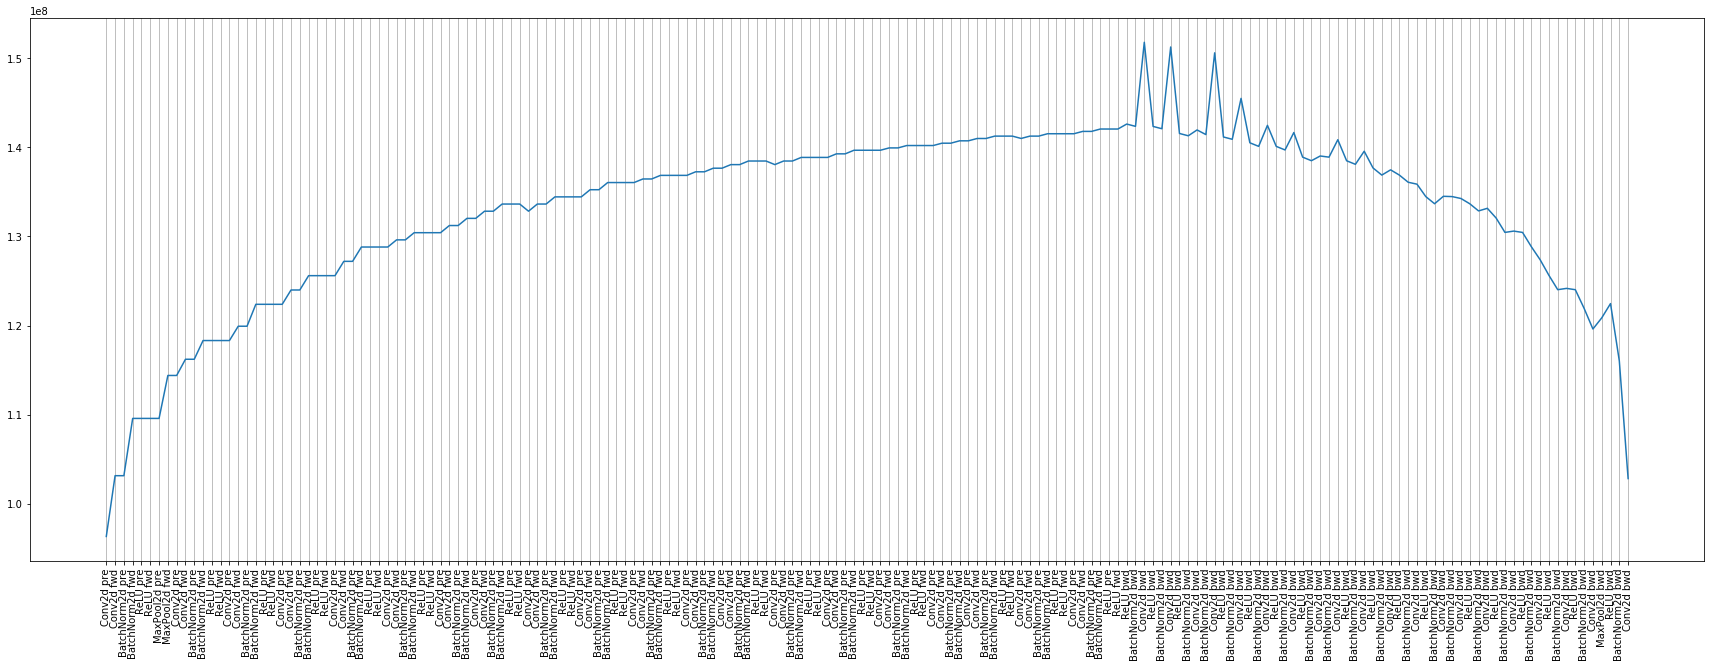

In [30]:
plt.figure(figsize=(30,10))
mem = log_memory(model, inp)
plt.xticks(range(len(mem["mem_all"])),mem["layer_type"].values+" "+mem["hook_type"].values,rotation=90)
plt.plot(mem["mem_all"])
plt.gca().xaxis.grid(True)